<a href="https://colab.research.google.com/github/VIVEKPATIL12/DS_Combined/blob/main/road_classification_FP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clone the dataset repository
!git clone https://github.com/VIVEKPATIL12/DataSet_DS.git

# Step 1: Unzip both datasets into a combined directory
!unzip -qq /content/DataSet_DS/DS1.zip -d /content/combined_folder
!unzip -qq /content/DataSet_DS/DS2.zip -d /content/combined_folder

Cloning into 'DataSet_DS'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), done.
Filtering content: 100% (2/2), 111.67 MiB | 35.15 MiB/s, done.


In [3]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

classes = ['dry', 'snowy', 'wet']  # replace with your actual class names
data_dir = '/content/combined_folder'
train_dir = 'Dataset/train/'
test_dir = 'Dataset/test/'

# Create train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

for cls in classes:
    # Create class-specific train and test directories
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # Get a list of all image files for this class
    image_files = os.listdir(os.path.join(data_dir, cls))

    # Split the files into train and test sets
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)  # 80% train, 20% test

    # Copy the train files into the train directory
    for file in train_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(train_dir, cls, file))

    # Copy the test files into the test directory
    for file in test_files:
        shutil.copy(os.path.join(data_dir, cls, file), os.path.join(test_dir, cls, file))



In [4]:
# Train the Model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import scipy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'Dataset/train/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


# Load the VGG16 network, ensuring the head FC layer sets are left off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=tf.keras.Input(shape=(224, 224, 3)))

# Construct the head of the model that will be placed on top of the base model
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dense(3, activation="softmax")(headModel)  # Change the number here according to your number of classes

# Place the head FC model on top of the base model (this will become the actual model we will train)
model = tf.keras.Model(inputs=baseModel.input, outputs=headModel)

# Loop over all layers in the base model and freeze them so they will not be updated during the training process
for layer in baseModel.layers:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# # Train the model
# model.fit(train_generator, validation_data=test_generator, epochs=2)

# # Save the model
# model.save('model.h5')





Found 9599 images belonging to 3 classes.
Found 2401 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 86s 230ms/step - accuracy: 0.8335 - loss: 0.5065 - val_accuracy: 0.8567 - val_loss: 0.3365
Epoch 2/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 50s 165ms/step - accuracy: 0.8718 - loss: 0.2947 - val_accuracy: 0.8626 - val_loss: 0.3586
Epoch 3/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.9033 - loss: 0.2302 - val_accuracy: 0.8313 - val_loss: 0.3621
Epoch 4/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.9191 - loss: 0.1967 - val_accuracy: 0.8513 - val_loss: 0.3454
Epoch 5/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.9332 - loss: 0.1777 - val_accuracy: 0.8588 - val_loss: 0.3792
Epoch 6/50
300/300 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.9516 - loss: 0.1356 - val_accuracy: 0.8305 - val_loss: 0.3944
Found 2401 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step


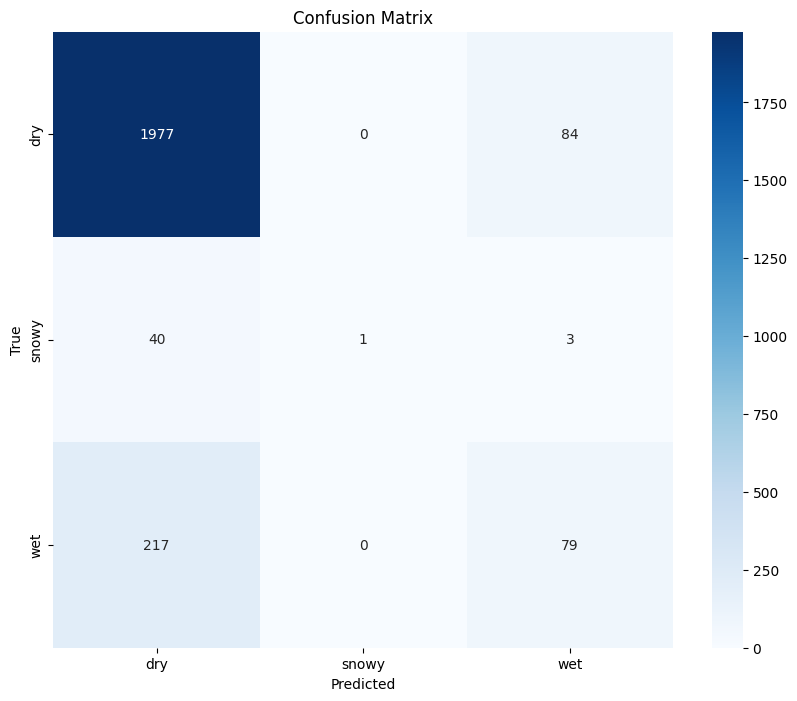

              precision    recall  f1-score   support

         dry       0.88      0.96      0.92      2061
       snowy       1.00      0.02      0.04        44
         wet       0.48      0.27      0.34       296

    accuracy                           0.86      2401
   macro avg       0.79      0.42      0.44      2401
weighted avg       0.84      0.86      0.83      2401



In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

model.fit(train_generator, validation_data=test_generator, epochs=50, callbacks=[early_stopping, model_checkpoint])
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 2401 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step
False Positives for dry: 257
False Positives for snowy: 0
False Positives for wet: 87


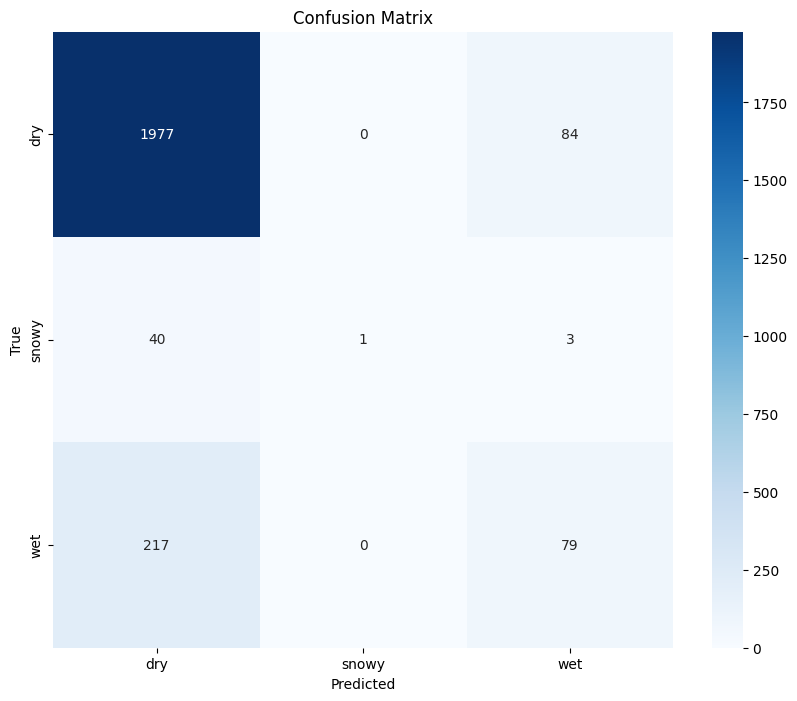

In [6]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Calculate false positives for each class
false_positives = conf_matrix.sum(axis=0) - np.diag(conf_matrix)

# Print false positives for each class
for i, class_label in enumerate(class_labels):
    print(f"False Positives for {class_label}: {false_positives[i]}")

# Optionally, plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Found 2401 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


76/76 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step
Copied AZIL6FY41M1BPSA_qBUzAg.jpg to False_Positives/wet_false_positives
Copied B5jS6wdsQ4K8DEvR1yrvkA.jpg to False_Positives/wet_false_positives
Copied BArT_Rn-ZC4muFPXhNJ2dw.jpg to False_Positives/wet_false_positives
Copied EIcL8TgEgpxXd03ZV7gPuw.jpg to False_Positives/wet_false_positives
Copied ETCS-UmHvGYEPP4f_lu5VQ.jpg to False_Positives/wet_false_positives
Copied EqpT4rUYa6IlUUxIgOIDKA.jpg to False_Positives/wet_false_positives
Copied Eu7Npo1slLXz02ywJDiE7Q.jpg to False_Positives/wet_false_positives
Copied EwGYWSfpXuE7SHsmtsA_tw.jpg to False_Positives/wet_false_positives
Copied F4mCWJ975i7Mn5lY9Gvb1g.jpg to False_Positives/wet_false_positives
Copied FAlPdEzGtbSpLrMXvmqrwg.jpg to False_Positives/wet_false_positives
Copied FChq3MKp8Z2ikeu2LyxLGA.jpg to False_Positives/wet_false_positives
Copied FHN5NZfnGeEgMRYtpn7CLQ.jpg to False_Positives/wet_false_positives
Copied FLJaprNEVZLecT8B3UnLoQ.jpg to False_Positives/wet_false_positives
Copied Fq

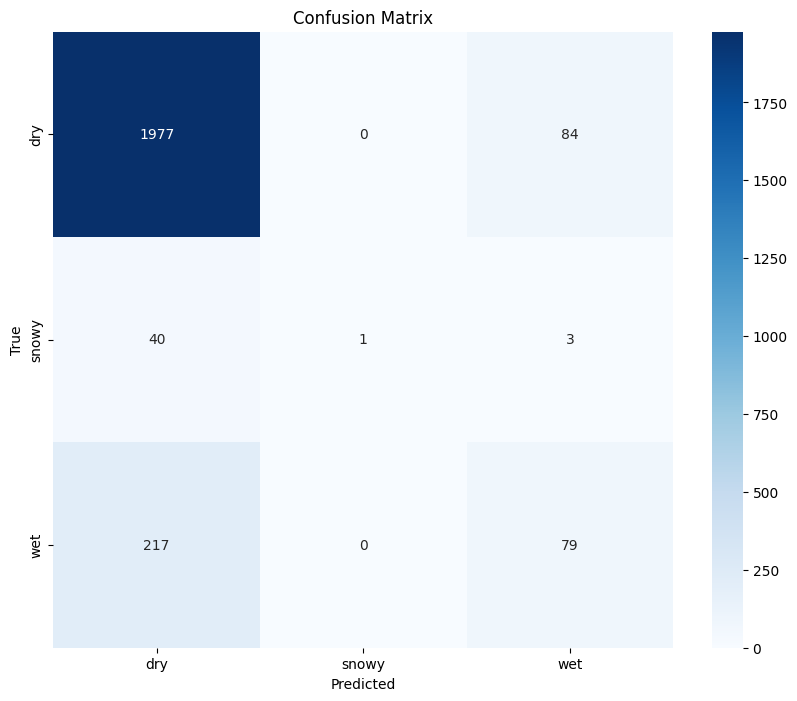

In [7]:
import os
import shutil
import numpy as np
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# Load the test data
test_generator = test_datagen.flow_from_directory(
    'Dataset/test/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Make predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Paths to store false positive images
output_dirs = {
    'dry': 'False_Positives/dry_false_positives',
    'snowy': 'False_Positives/snowy_false_positives',
    'wet': 'False_Positives/wet_false_positives'
}

# Create directories if they don't exist
for dir_path in output_dirs.values():
    os.makedirs(dir_path, exist_ok=True)

# Identify and copy false positive images to respective directories
for i, (pred, true) in enumerate(zip(predicted_classes, true_classes)):
    if pred != true:  # False positive condition
        predicted_class = class_labels[pred]
        true_class = class_labels[true]

        # Get the filename of the image
        image_path = test_generator.filepaths[i]
        image_name = os.path.basename(image_path)

        # Determine where to copy the image (based on predicted class)
        target_dir = output_dirs[predicted_class]

        # Copy the image to the corresponding false positive directory
        shutil.copy(image_path, os.path.join(target_dir, image_name))
        print(f"Copied {image_name} to {target_dir}")

print("False positive images have been separated and stored.")

# Optionally, you can still generate the confusion matrix and classification report:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()